# Equilibrium runs
This example shows how to run the **V**olume/**A**rea **S**caling (VAS) model on a single glacier.

In [1]:
# import externals libraries
import os
import shutil
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely.geometry as shpg
import matplotlib.pyplot as plt
%matplotlib inline

# import the needed OGGM modules
import oggm
from oggm import cfg, utils, graphics, workflow
from oggm.utils import get_demo_file, get_rgi_glacier_entities
from oggm.tests.funcs import get_test_dir
from oggm.core import gis, climate, centerlines, inversion, flowline, vascaling

In [2]:
# specify RGI info
rgi_version = '61'
rgi_region = '11'

## Preprocessing
The first step is always to load the default parameter file via `cgf.initialize()` and ajust parameters and paths as needed.

In [3]:
# load default parameter file
cfg.initialize()

# create working directory
wdir = utils.gettempdir('VAS_rofental_wdir')
if not os.path.exists(wdir):
    os.makedirs(wdir)
shutil.rmtree(wdir)
os.makedirs(wdir)
# set path to working directory
cfg.PATHS['working_dir'] = wdir
# set RGI verion and region
cfg.PARAMS['rgi_version'] = rgi_version
# define how many grid points to use around the glacier,
# if you expect the glacier to grow large use a larger border
cfg.PARAMS['border'] = 80
# we use HistAlp climate data
cfg.PARAMS['baseline_climate'] = 'HISTALP'
# set the mb hyper parameters accordingly
cfg.PARAMS['prcp_scaling_factor'] = 1.75
cfg.PARAMS['temp_melt'] = -1.75
# more glaciers, parallel processing
cfg.PARAMS['use_multiprocessing'] = True

2019-07-03 13:42:16: oggm.cfg: Using configuration file: /Users/oberrauch/oggm-fork/oggm/params.cfg


We use the RGI entity as main input to initialize the model glacier.

In [4]:
# RGI file
path = utils.get_rgi_region_file(rgi_region, version=rgi_version)
rgidf = gpd.read_file(path)

In [5]:
# Get the Rofental Basin file
path = utils.get_demo_file('rofental_hydrosheds.shp')
basin = gpd.read_file(path)

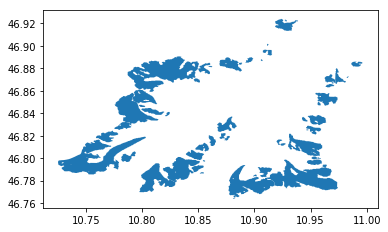

In [6]:
# Take all glaciers in the Rofental Basin
in_bas = [basin.geometry.contains(shpg.Point(x, y))[0] for
          (x, y) in zip(rgidf.CenLon, rgidf.CenLat)]
rgidf = rgidf.loc[in_bas]
rgidf.plot()

In [7]:
# get and set path to intersect shapefile
intersects_db = utils.get_rgi_intersects_region_file(region=rgi_region)
cfg.set_intersects_db(intersects_db)

The `GlacierDirectory` gives access to file paths and to I/O operations for the given glacier.

In [8]:
# initialize GlacierDirectories
gdirs = workflow.init_glacier_regions(rgidf)

2019-07-03 13:42:20: oggm.workflow: Execute entity task define_glacier_region on 54 glaciers
2019-07-03 13:42:20: oggm.workflow: Multiprocessing: using all available processors (N=4)
2019-07-03 13:42:20: oggm.core.gis: (RGI60-11.00690) define_glacier_region
2019-07-03 13:42:20: oggm.core.gis: (RGI60-11.00675) define_glacier_region
2019-07-03 13:42:20: oggm.core.gis: (RGI60-11.00674) define_glacier_region
2019-07-03 13:42:20: oggm.core.gis: (RGI60-11.00702) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00718) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00719) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00720) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00724) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00726) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00729) define_glacier_region
2019-07-03 13:42:21: oggm.core.gis: (RGI60-11.00731) define_glacier

2019-07-03 13:42:33: oggm.core.climate: (RGI60-11.00719) process_histalp_data
2019-07-03 13:42:33: oggm.core.climate: (RGI60-11.00720) process_histalp_data
2019-07-03 13:42:33: oggm.core.climate: (RGI60-11.00724) process_histalp_data
2019-07-03 13:42:34: oggm.core.climate: (RGI60-11.00726) process_histalp_data
2019-07-03 13:42:34: oggm.core.climate: (RGI60-11.00729) process_histalp_data
2019-07-03 13:42:34: oggm.core.climate: (RGI60-11.00731) process_histalp_data
2019-07-03 13:42:34: oggm.core.climate: (RGI60-11.00737) process_histalp_data
2019-07-03 13:42:35: oggm.core.climate: (RGI60-11.00745) process_histalp_data
2019-07-03 13:42:35: oggm.core.climate: (RGI60-11.00747) process_histalp_data
2019-07-03 13:42:35: oggm.core.climate: (RGI60-11.00739) process_histalp_data
2019-07-03 13:42:35: oggm.core.climate: (RGI60-11.00753) process_histalp_data
2019-07-03 13:42:36: oggm.core.climate: (RGI60-11.00757) process_histalp_data
2019-07-03 13:42:36: oggm.core.climate: (RGI60-11.00762) process

In [9]:
workflow.execute_entity_task(gis.glacier_masks, gdirs)

2019-07-03 13:42:24: oggm.workflow: Execute entity task glacier_masks on 54 glaciers


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
workflow.execute_entity_task(climate.process_histalp_data, gdirs)

2019-07-03 13:42:30: oggm.workflow: Execute entity task process_histalp_data on 54 glaciers


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
workflow.execute_entity_task(vascaling.local_t_star, gdirs);

2019-07-03 13:42:45: oggm.workflow: Execute entity task local_t_star on 54 glaciers


## Random climate (mass balance) model
The `RandomVASMassBalance` model is a good tool to investigate/understand the model behavior. It takes climate information from a randomly chosen year within a 31-year period of a specified year `y0` to compute the specific mass balance. Hence, the model runs on a synthetic climate based on actual observations.

If we choose the climatological period around the "equilibrium" year $t^*$ the model glacier should stay in equilibirum. The `run_random_climate` task allows to add a temperature bias. Increasing/decresing the temperature of the equilibirum period should result in a retreating/advancing model glacier, which reaches a new equilibrium after some years.

In [13]:
# define number of years to run
nyears = 300
# get equilibrium year t* for each glacier
t_stars = [gdir.read_json('vascaling_mustar')['t_star'] for gdir in gdirs]
# the bias is defined to be zero during the calibration process,
# which is why we don't use it here to reproduce the results
cfg.PARAMS['use_bias_for_run'] = False
# run RandomMassBalance model centered around t*, once without tempertaure bias
# and once with positive and negitave temperature bias of 0.5 °C each.
for t_star, gdir in zip(t_stars, gdirs):
    vascaling.run_random_climate(gdir, nyears=nyears,
                                 y0=t_star, seed=12, output_filesuffix='_normal')
    vascaling.run_random_climate(gdir, nyears=nyears, y0=t_star,
                                 temperature_bias=+0.5, seed=12, output_filesuffix='_bias_p')
    vascaling.run_random_climate(gdir, nyears=nyears, y0=t_star,
                                 temperature_bias=-0.5, seed=12, output_filesuffix='_bias_m')

2019-07-03 13:43:34: oggm.core.vascaling: (RGI60-11.00674) run_random_climate_normal
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
2019-07-03 13:43:35: oggm.core.vascaling: (RGI60-11.00674) run_random_climate_bias_p
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
2019-07-03 13:43:36: oggm.core.vascaling: (RGI60-11.00674) run_random_climate_bias_m
2019-07-03 13:43:36: oggm.core.vascaling: (RGI60-11.00675) run_random_climate_normal
2019-07-03 13:43:37: oggm.core.vascaling: (RGI60-11.00675) run_random_climate_bias_p
/Users/oberrauch/oggm-fork/oggm/core/vascaling.py:1744: RuntimeWarning: invalid value encountered in double_scalars
  self.dA = ((self.volu

2019-07-03 13:44:17: oggm.core.vascaling: (RGI60-11.00862) run_random_climate_bias_p
2019-07-03 13:44:18: oggm.core.vascaling: (RGI60-11.00862) run_random_climate_bias_m
2019-07-03 13:44:18: oggm.core.vascaling: (RGI60-11.00873) run_random_climate_normal
2019-07-03 13:44:19: oggm.core.vascaling: (RGI60-11.00873) run_random_climate_bias_p
2019-07-03 13:44:19: oggm.core.vascaling: (RGI60-11.00873) run_random_climate_bias_m
2019-07-03 13:44:20: oggm.core.vascaling: (RGI60-11.00885) run_random_climate_normal
2019-07-03 13:44:20: oggm.core.vascaling: (RGI60-11.00885) run_random_climate_bias_p
2019-07-03 13:44:20: oggm.core.vascaling: (RGI60-11.00885) run_random_climate_bias_m
2019-07-03 13:44:21: oggm.core.vascaling: (RGI60-11.00886) run_random_climate_normal
2019-07-03 13:44:21: oggm.core.vascaling: (RGI60-11.00886) run_random_climate_bias_p
2019-07-03 13:44:22: oggm.core.vascaling: (RGI60-11.00886) run_random_climate_bias_m
2019-07-03 13:44:22: oggm.core.vascaling: (RGI60-11.00888) run_ra

Each task writes its output in a different file (specified by the suffix). To work with produced data, the output must be compiled (i.e., converted into a `xarray.dataset`). In this notebook we work only on a single glacier, however the `compile_run_output` task handels multiple glaciers (represented by `GlacierDirectorie`s at once).

In [14]:
def normalize_with_start(ds):
    """Normalize all data variables with their respecitve first entry.
    Retrurn a new xarray.dataset. """
    # copy the given dataset
    ds_ = ds.copy()
    # iterate over all data variables
    for var in ds_.data_vars:
        # normalize with start value
        ds_[var] = ds_[var]/ds_[var].sel({'time': 0})
    # return normalized dataset
    return ds_

In [15]:
# compile the run output and normalize glacier geometries with start value
ds = utils.compile_run_output([gdir], filesuffix='_normal')
ds_p = utils.compile_run_output([gdir], filesuffix='_bias_p')
ds_m = utils.compile_run_output([gdir], filesuffix='_bias_m')

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


In [16]:
# compile the run output
# normalize glacier geometries with start value
# compute average
ds = normalize_with_start(utils.compile_run_output(gdirs, filesuffix='_normal')).mean(dim='rgi_id')
ds_p = normalize_with_start(utils.compile_run_output(gdirs, filesuffix='_bias_p')).mean(dim='rgi_id')
ds_m = normalize_with_start(utils.compile_run_output(gdirs, filesuffix='_bias_m')).mean(dim='rgi_id')

/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")
/Users/oberrauch/miniconda3/envs/oggm_env/lib/python3.6/site-packages/dask/utils.py:1010: UserWarning: Deprecated, see dask.base.get_scheduler instead
  warnings.warn("Deprecated, see dask.base.get_scheduler instead")


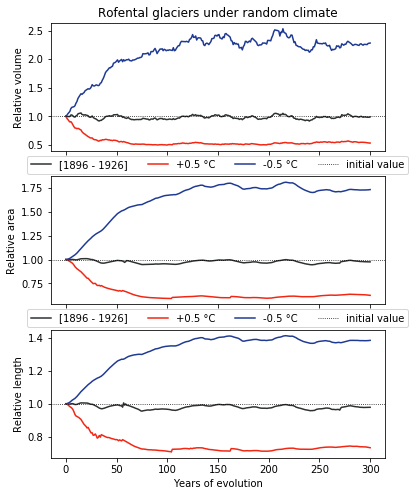

In [17]:
# create figure and axes
fig, [ax0, ax1, ax2] = plt.subplots(3,1, figsize=[6,8])
# plot the evolution of glacier volume
ax0.plot(ds.volume, label='[{} - {}]'.format(t_star-15, t_star+15), c='#2e3131')
ax0.plot(ds_p.volume, label='+0.5 °C', c='#f22613')
ax0.plot(ds_m.volume, label='-0.5 °C', c='#1f3a93')
ax0.axhline(ds.volume[0], c='k', ls=':', lw=0.8, label='initial value')
ax0.set_xticklabels('')
ax0.set_ylabel('Relative volume')
ax0.set_title('Rofental glaciers under random climate')
ax0.legend(bbox_to_anchor=(0.5, 0), loc=9, ncol=4)

# plot the evolution of glacier area
ax1.plot(ds.area, label='[{} - {}]'.format(t_star-15, t_star+15), c='#2e3131')
ax1.plot(ds_p.area, label='+0.5 °C', c='#f22613')
ax1.plot(ds_m.area, label='-0.5 °C', c='#1f3a93')
ax1.axhline(ds.area[0], c='k', ls=':', lw=0.8, label='initial value')
ax1.set_xticklabels('')
ax1.set_ylabel('Relative area')
ax1.legend(bbox_to_anchor=(0.5, 0), loc=9, ncol=4)

# plot the evolution of glacier length
ax2.plot(ds.length, label='[{} - {}]'.format(t_star-15, t_star+15), c='#2e3131')
ax2.plot(ds_p.length, label='+0.5 °C', c='#f22613')
ax2.plot(ds_m.length, label='-0.5 °C', c='#1f3a93')
ax2.axhline(ds.length[0], c='k', ls=':', lw=0.8, label='initial value')
ax2.set_xlabel('Years of evolution')
ax2.set_ylabel('Relative length')

fig.savefig('rofental_random_climate.jpg', bbox_inches='tight')

## Compare with OGGM

In [ ]:
# load default parameter file
cfg.initialize()

# create working directory
wdir = utils.gettempdir('VAS_HEF_wdir')
if not os.path.exists(wdir):
    os.makedirs(wdir)
shutil.rmtree(wdir)
os.makedirs(wdir)
# set path to working directory
cfg.PATHS['working_dir'] = wdir
# set RGI verion and region
cfg.PARAMS['rgi_version'] = rgi_version
# define how many grid points to use around the glacier,
# if you expect the glacier to grow large use a larger border
cfg.PARAMS['border'] = 100
# we use HistAlp climate data
cfg.PARAMS['baseline_climate'] = 'HISTALP'
# set the mb hyper parameters accordingly
cfg.PARAMS['prcp_scaling_factor'] = 1.75
cfg.PARAMS['temp_melt'] = -1.75

In [ ]:
# read RGI entry for Hintereisferner as DataFrame
# containing the outline area as shapefile
entity = utils.get_rgi_glacier_entities([rgi_id]).iloc[0]
# get and set path to intersect shapefile
intersects_db = utils.get_rgi_intersects_region_file(region=rgi_region)
cfg.set_intersects_db(intersects_db)
# initialize the GlacierDirectory
gdir = oggm.GlacierDirectory(entity, reset=True)

In [ ]:
# define the local grid and glacier mask
gis.define_glacier_region(gdir, entity=entity)
gis.glacier_masks(gdir)

In [ ]:
# run center line preprocessing tasks
centerlines.compute_centerlines(gdir)
centerlines.initialize_flowlines(gdir)
centerlines.compute_downstream_line(gdir)
centerlines.compute_downstream_bedshape(gdir)
centerlines.catchment_area(gdir)
centerlines.catchment_intersections(gdir)
centerlines.catchment_width_geom(gdir)
centerlines.catchment_width_correction(gdir)

In [ ]:
# compute the mass balance parameters for the OGGM model
climate.process_histalp_data(gdir)
climate.local_t_star(gdir)
climate.mu_star_calibration(gdir)

In [ ]:
# run inversion tasks
inversion.prepare_for_inversion(gdir)
inversion.mass_conservation_inversion(gdir)
inversion.filter_inversion_output(gdir)

In [ ]:
# final task
flowline.init_present_time_glacier(gdir)

In [ ]:
# define number of years to run
nyears = 300
# get equilibrium year t* for HEF
t_star_oggm = gdir.read_json('local_mustar')['t_star']
# the bias is defined to be zero during the calibration process,
# which is why we don't use it here to reproduce the results
cfg.PARAMS['use_bias_for_run'] = True
# run RandomMassBalance model centered around t*, once without tempertaure bias
# and once with positive and negitave temperature bias of 0.5 °C each.
flowline.run_random_climate(gdir, nyears=nyears, y0=t_star_oggm, seed=12, output_filesuffix='_oggm_mbbias')
flowline.run_random_climate(gdir, nyears=nyears, y0=t_star_oggm, temperature_bias=+0.5,
                             seed=12, output_filesuffix='_oggm_mbbias_bias_p')
flowline.run_random_climate(gdir, nyears=nyears, y0=t_star_oggm, temperature_bias=-0.5,
                             seed=12, output_filesuffix='_oggm_mbbias_bias_m');

In [ ]:
ds_oggm = normalize_with_start(utils.compile_run_output([gdir], filesuffix='_oggm'))
ds_oggm_p = normalize_with_start(utils.compile_run_output([gdir], filesuffix='_oggm_bias_p'))
ds_oggm_m = normalize_with_start(utils.compile_run_output([gdir], filesuffix='_oggm_bias_m'))

In [ ]:
ds_oggm_mbbias = normalize_with_start(utils.compile_run_output([gdir], filesuffix='_oggm_mbbias'))
ds_oggm_mbbias_p = normalize_with_start(utils.compile_run_output([gdir], filesuffix='_oggm_mbbias_bias_p'))
ds_oggm_mbbias_m = normalize_with_start(utils.compile_run_output([gdir], filesuffix='_oggm_mbbias_bias_m'))

In [ ]:
# create figure and axes
fig, [ax0, ax1] = plt.subplots(2, 1, figsize=[6,8])
# plot the evolution of glacier volume
ax0.plot(ds.volume, label='[{} - {}]'.format(t_star-15, t_star+15), c='#2e3131')
ax0.plot(ds_p.volume, label='+0.5 °C', c='#f22613')
ax0.plot(ds_m.volume, label='-0.5 °C', c='#1f3a93')
ax0.axhline(ds.volume[0], c='k', ls=':', lw=0.8, label='initial volume')
ax0.set_ylabel('Relative volume')
ax0.set_title('Volume/Area scaling model')
ax0.legend()
ax1.plot(ds_oggm.volume, label='[{} - {}]'.format(t_star_oggm-15, t_star_oggm+15), c='#6c7a89')
ax1.plot(ds_oggm_p.volume, label='+0.5 °C', c='#f89406')
ax1.plot(ds_oggm_m.volume, label='-0.5 °C', c='#2c82c9')
ax1.axhline(ds_oggm.volume[0], c='k', ls=':', lw=0.8, label='initial volume')
ax1.set_ylabel('Volume [km$^3$]')
ax1.set_title('Relative volume')
ax1.legend()

fig.savefig('vas_oggm_random.pdf', bbox_inches='tight')

In [ ]:
# create figure and axes
fig, ax0 = plt.subplots(1, 1, figsize=[8,4])

# plot normalized vas volume
ax0.plot(ds.volume, label='[{} - {}]'.format(t_star-15, t_star+15), c='#1f3a93', lw=2)
ax0.plot(ds_p.volume, label='+0.5 °C', c='#4d13d1', lw=2)
ax0.plot(ds_m.volume, label='-0.5 °C', c='#19b5fe', lw=2)

# add aux line at 1
ax0.axhline(ds.volume[0], c='k', ls=':', lw=0.8)

# plot normalized oggm volume
ax0.plot(ds_oggm.volume, label='[{} - {}]'.format(t_star_oggm-15, t_star_oggm+15), c='#d35400', ls='-.', lw=1.5)
ax0.plot(ds_oggm_p.volume, label='+0.5 °C', c='#cf000f', ls='-.', lw=1.5)
ax0.plot(ds_oggm_m.volume, label='-0.5 °C', c='#fcd670', ls='-.', lw=1.5)

# add legend(s)
handels, labels = ax0.get_legend_handles_labels()
l_vas = ax0.legend(handels[:3], labels[:3], title='VAS model', bbox_to_anchor=(1, 1), loc=2)
l_vas.get_title().set_fontweight('bold')
l_oggm = ax0.legend(handels[3:], labels[3:], title='OGGM', bbox_to_anchor=(1, 0), loc=3)
l_oggm.get_title().set_fontweight('bold')
ax0.add_artist(l_vas)

# title, labels, ...
ax0.set_title('Evolution of HEF volume under random (equilibrium) climate')
ax0.set_xlabel('Years of evolution')
ax0.set_ylabel('Relative glacier volume')

# store to file
fig.savefig('vas_oggm_random_oneplot.jpg', bbox_inches='tight')

## Finding a historic start area
TODO...

In [ ]:
res = vascaling.find_start_area(gdir, year_start=t_star)
res

In [ ]:
vascaling.run_random_climate(gdir, nyears=nyears, y0=t_star, seed=12, init_area_m2=res.x, output_filesuffix='_init')

In [ ]:
ds_init = utils.compile_run_output([gdir], filesuffix='_init')

In [ ]:
ax = plt.subplot(1,1,1)
ax.plot(ds.area, label='')
ax.plot(ds_init.area)

In [ ]:
ds.volume.plot()